In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('data/train/cat/cat.2500.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)

Using TensorFlow backend.


<class 'numpy.ndarray'>
(1, 351, 338, 3)


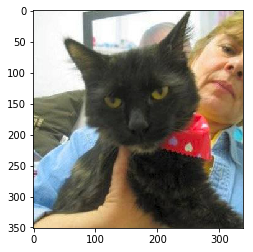

In [3]:
import matplotlib.pyplot as plt

print(type(x))
print(x.shape)
plt.imshow(img)

In [4]:
from keras.models import model_from_json
def load_model():
    print("===================== load model =========================")
    json_file = open("tt.json", 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("first_try.h5")
    print("Loaded model from disk")
    return loaded_model

In [5]:
model1 = load_model()

===================== load model =========================
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Loaded model from disk


In [24]:
import cv2
import numpy as np
def predict_image(model_p, path):
    classes = ["cat", "dog"]
    image = cv2.imread(path)
    image = cv2.resize(image, (150, 150), interpolation=cv2.INTER_CUBIC)
    image = np.array(image)
    image = image.astype('float32')
    image = image.reshape([1,150,150,3])
    image /= 255
    pred = model_p.predict_classes(image)
    pred_class = pred[0][0]
    print(classes[pred_class])

In [25]:
predict_image(model1, 'data/train/cat/cat.2500.jpg')
predict_image(model1, 'data/train/dog/dog.2500.jpg')

1/1 [==============================] - 0s
dog
1/1 [==============================] - 0s
dog
